# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math
import random
import numpy as np
from matplotlib.colors import ListedColormap

In [3]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

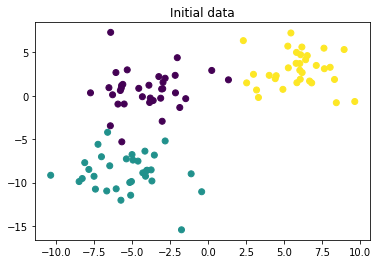

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [5]:
 
def funct_kNN(x_train, y_train, x_test, k):
    def Eucl_distance (a, b):
        return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    y_test = []
    for testPoint in x_test:
        dist = [[Eucl_distance(testPoint, x_train[i]), y_train[i]] for i in range(len(y_train))]
        K_neib = []
        for d in sorted(dist)[0:k]:
            K_neib.append(d[1])
        def most_common(lst):
            res = dict((lst.count(i), i) for i in set(lst))
            return res[max(res.keys())]
        y_test.append(most_common(K_neib))
    return y_test


Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [6]:
def splitTrainTest (dataX, dataY):
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    for i in range(len(dataX)):
        if random.random() < 0.4:
            x_test.append(dataX[i])
            y_test.append(dataY[i])
        else:
            x_train.append(dataX[i])
            y_train.append(dataY[i])
    return (x_train, y_train, x_test, y_test)
#Calculate classification accuracy

def calculateAccuracy (k):
    data = splitTrainTest (X, Y)
    x_train = data[0]
    y_train = data[1]
    x_test = data[2]
    y_testKNN = funct_kNN(x_train, y_train, x_test, k)
    print("Accuracy: ", sum([int(y_testKNN[i]==data[3][i]) for i in range(len(y_testKNN))]) / float(len(Y)))
calculateAccuracy (7)

Accuracy:  0.38


Постройте разделающие поверхности, которые строит классификатор

In [7]:
def showDataOnMesh (k):
    def generateTestMesh (X):
        x_min = min( X[:,0] ) - 1.0
        x_max = max( X[:,0] ) + 1.0
        y_min = min( X[:,1] ) - 1.0
        y_max = max( X[:,1] ) + 1.0
        h = 0.05
        testX, testY = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        return [testX, testY]
    testMesh       = generateTestMesh (X)	
    testMeshLabels = funct_kNN(X, Y, zip(testMesh[0].ravel(), testMesh[1].ravel()), k)
    classColormap  = ListedColormap(['#FF0000', '#00FF00', '#FFFFFF'])
    testColormap   = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAAA'])
    plt.figure(figsize=(15,10))
    plt.pcolormesh(testMesh[0],
                  testMesh[1],
                  np.asarray(testMeshLabels).reshape(testMesh[0].shape),
                  cmap=testColormap)
    plt.scatter( X[:,0],
                X[:,1],
               c=Y,
               cmap=classColormap)
    plt.show()


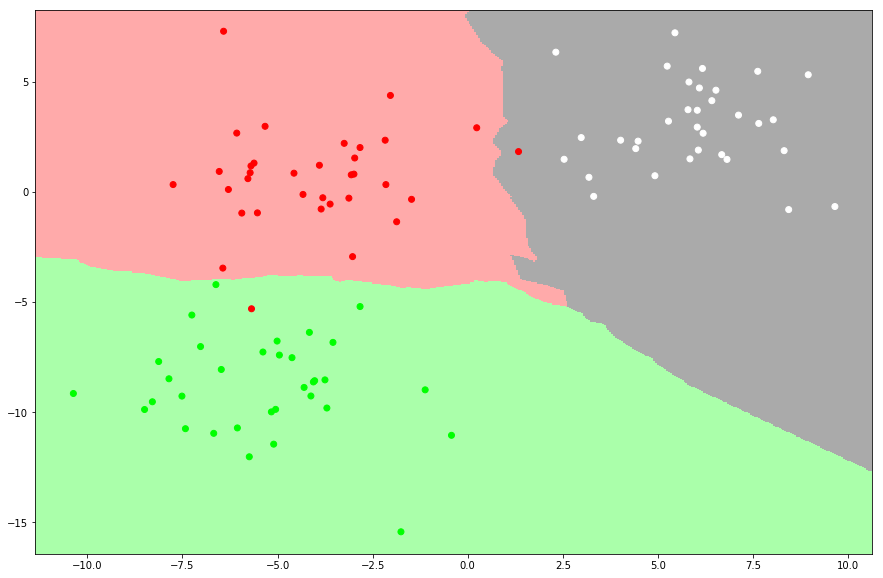

In [8]:
showDataOnMesh(7)

In [ ]:
showDataOnMesh(3)

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

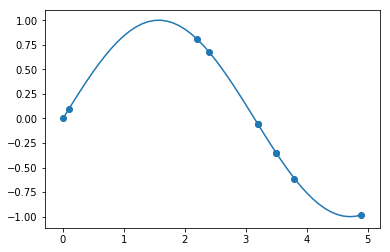

In [9]:
x_real = np.arange(0, 5, 0.1).tolist()
y_real = np.sin(x_real)
plt.plot(x_real, y_real)
x = np.array(random.choices(x_real, k = 10))
y = np.sin(x)
plt.scatter(x, y)

In [10]:
def KNN_Regression(x_train, y_train, x_test, k):
    def distance (a, b):
        return abs(a - b)
    value = []
    for point in x_test:   
        dist = [[distance(point, x_train[i]), y_train[i]] for i in range(len(y_train)) ]
        K_neib = []
        for d in sorted(dist)[0:k]:
            K_neib.append(d[1])
        value.append(sum(K_neib)/k)
    return value

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

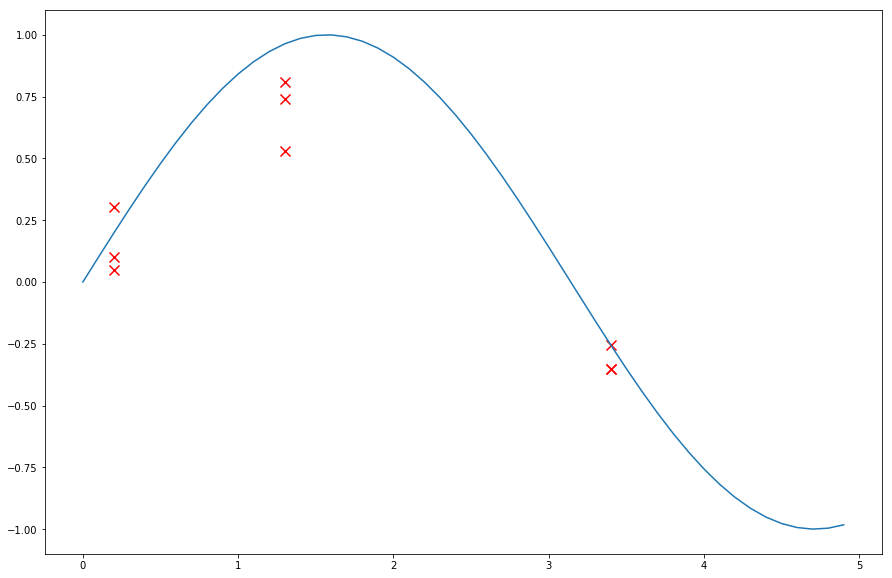

In [13]:
plt.figure(figsize=(15,10))
plt.plot(x_real, y_real)
x_pred = np.array([0.2,1.3, 3.4], dtype=float)
k = 1
plt.scatter(x_pred, KNN_Regression(x, y, x_pred, k), s = 100, marker='x', c='r')

k = 2
plt.scatter(x_pred, KNN_Regression(x, y, x_pred, k), s = 100, marker='x', c='r')

k = 3
plt.scatter(x_pred, KNN_Regression(x, y, x_pred, k), s = 100, marker='x', c='r')


In [16]:
#plt.figure(figsize=(15,10))
#plt.plot(x_real, y_real)
#plt.scatter(x, y)
#k =1
#plt.plot(x_real, KNN_Regression(x, y, x_real, k), color='r')
